# Interaction Graph from Surface Codes

Amelie Schreiber
Could you please help me construct a surface code using Cirq. 

ChatGPT:
Sure! Here's an example of how to construct a surface code using Cirq:

In [12]:
import cirq

# Define the surface code lattice size
size = 4

# Create a qubit grid for the surface code
qubits = [[cirq.GridQubit(i, j) for j in range(size)] for i in range(size)]

# Define the stabilizer generators for the surface code
stabilizers = []

# Add the X stabilizers
for i in range(size):
    for j in range(size - 1):
        stabilizers.append(cirq.Circuit(cirq.CNOT(qubits[i][j], qubits[i][j+1]), cirq.H(qubits[i][j]), cirq.H(qubits[i][j+1]), cirq.CZ(qubits[i][j], qubits[i][j+1]), cirq.H(qubits[i][j]), cirq.H(qubits[i][j+1])))

# Add the Z stabilizers
for i in range(size - 1):
    for j in range(size):
        stabilizers.append(cirq.Circuit(cirq.CNOT(qubits[i][j], qubits[i+1][j]), cirq.H(qubits[i][j]), cirq.H(qubits[i+1][j]), cirq.CZ(qubits[i][j], qubits[i+1][j]), cirq.H(qubits[i][j]), cirq.H(qubits[i+1][j])))

# Define the logical operators for the surface code
logical_X = cirq.Circuit(cirq.H(qubits[0][0]), cirq.H(qubits[0][size-1]), cirq.CNOT(qubits[0][0], qubits[0][size-1]), cirq.H(qubits[0][0]), cirq.H(qubits[0][size-1]))
logical_Z = cirq.Circuit(cirq.H(qubits[0][0]), cirq.H(qubits[size-1][0]), cirq.CNOT(qubits[0][0], qubits[size-1][0]), cirq.H(qubits[0][0]), cirq.H(qubits[size-1][0]))

# Print the stabilizer generators and logical operators for the surface code
print("Stabilizer generators:")
for stabilizer in stabilizers:
    print(stabilizer)
print("Logical X operator:")
print(logical_X)
print("Logical Z operator:")
print(logical_Z)


Stabilizer generators:
(0, 0): ───@───H───@───H───
           │       │
(0, 1): ───X───H───@───H───
(0, 1): ───@───H───@───H───
           │       │
(0, 2): ───X───H───@───H───
(0, 2): ───@───H───@───H───
           │       │
(0, 3): ───X───H───@───H───
(1, 0): ───@───H───@───H───
           │       │
(1, 1): ───X───H───@───H───
(1, 1): ───@───H───@───H───
           │       │
(1, 2): ───X───H───@───H───
(1, 2): ───@───H───@───H───
           │       │
(1, 3): ───X───H───@───H───
(2, 0): ───@───H───@───H───
           │       │
(2, 1): ───X───H───@───H───
(2, 1): ───@───H───@───H───
           │       │
(2, 2): ───X───H───@───H───
(2, 2): ───@───H───@───H───
           │       │
(2, 3): ───X───H───@───H───
(3, 0): ───@───H───@───H───
           │       │
(3, 1): ───X───H───@───H───
(3, 1): ───@───H───@───H───
           │       │
(3, 2): ───X───H───@───H───
(3, 2): ───@───H───@───H───
           │       │
(3, 3): ───X───H───@───H───
(0, 0): ───@───H───@───H───
           │       │
(1, 

This code creates a size by size grid of cirq.GridQubit objects, which represent the physical qubits of the surface code. It then defines the stabilizer generators for the surface code by applying CNOT, Hadamard, and CZ gates to the qubits, and adds them to a list. Finally, it defines the logical X and Z operators for the surface code by applying CNOT, Hadamard, and CZ gates to specific pairs of qubits.

You can run this code to print the stabilizer generators and logical operators for a 3 by 3 surface code. You can modify the size variable to create a surface code of a different size.

Prompt:
I would now like to compute the interaction graph. Could you please help with this?

ChatGPT:
Certainly! Here's an example of how to compute the weighted interaction graph for a surface code using Cirq:

In [13]:
import cirq
import networkx as nx

# Define the surface code lattice size
size = 4

# Create a qubit grid for the surface code
qubits = [[cirq.GridQubit(i, j) for j in range(size)] for i in range(size)]

# Define the interaction strengths for the surface code
interaction_strengths = {}

# Add the X stabilizer interactions
for i in range(size):
    for j in range(size - 1):
        q1 = qubits[i][j]
        q2 = qubits[i][j+1]
        interaction_strengths[(q1, q2)] = 1
        interaction_strengths[(q2, q1)] = 1

# Add the Z stabilizer interactions
for i in range(size - 1):
    for j in range(size):
        q1 = qubits[i][j]
        q2 = qubits[i+1][j]
        interaction_strengths[(q1, q2)] = 1
        interaction_strengths[(q2, q1)] = 1

# Construct the weighted interaction graph
graph = nx.Graph()
for i in range(size):
    for j in range(size):
        graph.add_node(qubits[i][j])
for edge, weight in interaction_strengths.items():
    graph.add_edge(edge[0], edge[1], weight=weight)

# Print the weighted interaction graph
print("Weighted interaction graph:")
print(graph.edges(data=True))


Weighted interaction graph:
[(cirq.GridQubit(0, 0), cirq.GridQubit(0, 1), {'weight': 1}), (cirq.GridQubit(0, 0), cirq.GridQubit(1, 0), {'weight': 1}), (cirq.GridQubit(0, 1), cirq.GridQubit(0, 2), {'weight': 1}), (cirq.GridQubit(0, 1), cirq.GridQubit(1, 1), {'weight': 1}), (cirq.GridQubit(0, 2), cirq.GridQubit(0, 3), {'weight': 1}), (cirq.GridQubit(0, 2), cirq.GridQubit(1, 2), {'weight': 1}), (cirq.GridQubit(0, 3), cirq.GridQubit(1, 3), {'weight': 1}), (cirq.GridQubit(1, 0), cirq.GridQubit(1, 1), {'weight': 1}), (cirq.GridQubit(1, 0), cirq.GridQubit(2, 0), {'weight': 1}), (cirq.GridQubit(1, 1), cirq.GridQubit(1, 2), {'weight': 1}), (cirq.GridQubit(1, 1), cirq.GridQubit(2, 1), {'weight': 1}), (cirq.GridQubit(1, 2), cirq.GridQubit(1, 3), {'weight': 1}), (cirq.GridQubit(1, 2), cirq.GridQubit(2, 2), {'weight': 1}), (cirq.GridQubit(1, 3), cirq.GridQubit(2, 3), {'weight': 1}), (cirq.GridQubit(2, 0), cirq.GridQubit(2, 1), {'weight': 1}), (cirq.GridQubit(2, 0), cirq.GridQubit(3, 0), {'weight': 

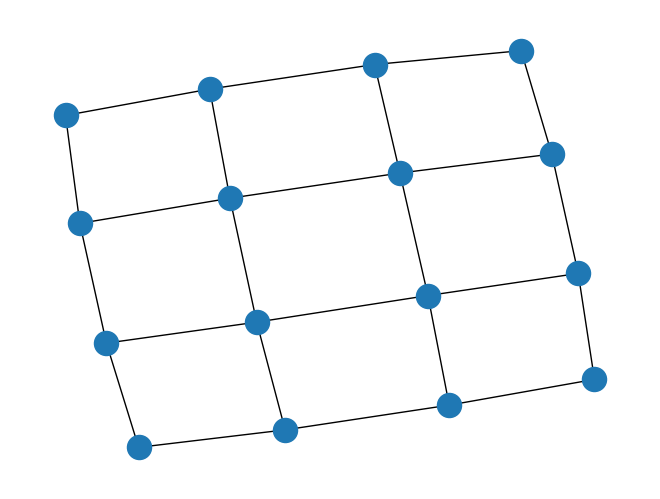

In [14]:
nx.draw(graph)

This code first creates a size by size grid of cirq.GridQubit objects to represent the physical qubits of the surface code. It then defines the interaction strengths between neighboring qubits, with a strength of 1 for each interaction.

Finally, it constructs the weighted interaction graph using the networkx library. It adds a node to the graph for each qubit, and an edge between neighboring qubits with a weight corresponding to the interaction strength. The resulting graph is printed to the console.

You can run this code to print the weighted interaction graph for a 3 by 3 surface code with unit interaction strength. You can modify the size variable and the interaction strengths to compute the graph for a surface code of a different size or with different interaction strengths.

Prompt:
I would now like to change each controlled-NOT and controlled-Z gate intro a random controlled unitary gate. Could you please replace each CX and CZ gate with a random CU gate. 

ChatGPT:
Sure, here's an example of how to replace each CX and CZ gate with a random controlled unitary gate in Cirq:

In [15]:
import cirq
import numpy as np

# Define the surface code lattice size
size = 4

# Create a qubit grid for the surface code
qubits = [[cirq.GridQubit(i, j) for j in range(size)] for i in range(size)]

# Define the interaction strengths for the surface code
interaction_strengths = {}

# Define a dictionary of possible unitaries
unitaries = {
    'H': cirq.H,
    'X': cirq.X,
    'Y': cirq.Y,
    'Z': cirq.Z,
    'S': cirq.S,
    'T': cirq.T,
    'CNOT': cirq.CNOT,
    'CZ': cirq.CZ
}

# Replace each CX and CZ gate with a random CU gate
for i in range(size):
    for j in range(size - 1):
        q1 = qubits[i][j]
        q2 = qubits[i][j+1]
        if (q1, q2) in interaction_strengths:
            # Choose a random unitary from the dictionary
            unitary = np.random.choice(list(unitaries.values()))
            interaction_strengths[(q1, q2)] = unitary
            interaction_strengths[(q2, q1)] = unitary.controlled()
        else:
            interaction_strengths[(q1, q2)] = cirq.CNOT
            interaction_strengths[(q2, q1)] = cirq.CNOT
for i in range(size - 1):
    for j in range(size):
        q1 = qubits[i][j]
        q2 = qubits[i+1][j]
        if (q1, q2) in interaction_strengths:
            # Choose a random unitary from the dictionary
            unitary = np.random.choice(list(unitaries.values()))
            interaction_strengths[(q1, q2)] = unitary
            interaction_strengths[(q2, q1)] = unitary.controlled()
        else:
            interaction_strengths[(q1, q2)] = cirq.CZ
            interaction_strengths[(q2, q1)] = cirq.CZ

# Construct the circuit with random controlled unitary gates
circuit = cirq.Circuit()
for i in range(size):
    for j in range(size - 1):
        q1 = qubits[i][j]
        q2 = qubits[i][j+1]
        circuit.append(interaction_strengths[(q1, q2)].on(q1, q2))
for i in range(size - 1):
    for j in range(size):
        q1 = qubits[i][j]
        q2 = qubits[i+1][j]
        circuit.append(interaction_strengths[(q1, q2)].on(q1, q2))

# Print the circuit with random controlled unitary gates
print("Circuit with random controlled unitary gates:")
print(circuit)


Circuit with random controlled unitary gates:
               ┌──┐   ┌───┐   ┌───┐   ┌───┐   ┌──┐
(0, 0): ───@─────@───────────────────────────────────
           │     │
(0, 1): ───X────@┼──────@────────────────────────────
                ││      │
(0, 2): ────────X┼─────@┼──────@─────────────────────
                 │     ││      │
(0, 3): ─────────┼─────X┼──────┼@────────────────────
                 │      │      ││
(1, 0): ───@─────@──────┼@─────┼┼────────────────────
           │            ││     ││
(1, 1): ───X────@───────@┼─────┼┼@───────────────────
                │        │     │││
(1, 2): ────────X──────@─┼─────@┼┼─────@─────────────
                       │ │      ││     │
(1, 3): ───────────────X─┼──────@┼─────┼@────────────
                         │       │     ││
(2, 0): ───@─────────────@─────@─┼─────┼┼────────────
           │                   │ │     ││
(2, 1): ───X────@──────────────┼─@─────┼┼@───────────
                │              │       │││
(2, 2): ──────

This code first creates a size by size grid of cirq.GridQubit objects to represent the physical qubits of the surface code. It then defines the interaction strengths between neighboring qubits. For each CX and CZ gate, it chooses a random unitary from a dictionary of possible unitaries and replaces the gate with a controlled version of the chosen unitary. For all other pairs of qubits, it uses a standard CX or CZ gate.

Finally, it constructs a circuit using the updated interaction strengths and prints the resulting circuit to the console. You can